In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [33]:
# df = pd.read_csv("./butterknife_results/commits_info.csv")
df = pd.read_csv("./NextChat_results/commits_info.csv")
df

,old_file_path,new_file_path,commit_SHA,parent_commit_SHA,commit_message,diff_myers,diff_histogram,diff_match
0,app/client/api.ts,app/client/api.ts,8f6e5d73a246bf00d944e98f655bce558226a485,fd441d9303b9d77bf21e9e93c19e31f4e36b3b7f,hotfix: can send sd task in client,"{'added': [(171, 'export function getBearerTok...","{'added': [(171, 'export function getBearerTok...",Yes
1,app/constant.ts,app/constant.ts,8f6e5d73a246bf00d944e98f655bce558226a485,fd441d9303b9d77bf21e9e93c19e31f4e36b3b7f,hotfix: can send sd task in client,"{'added': [(49, ' Stability = ""/api/stability...","{'added': [(49, ' Stability = ""/api/stability...",Yes
2,app/store/access.ts,app/store/access.ts,8f6e5d73a246bf00d944e98f655bce558226a485,fd441d9303b9d77bf21e9e93c19e31f4e36b3b7f,hotfix: can send sd task in client,"{'added': [(42, 'const DEFAULT_STABILITY_URL =...","{'added': [(42, 'const DEFAULT_STABILITY_URL =...",Yes
3,app/store/sd.ts,app/store/sd.ts,8f6e5d73a246bf00d944e98f655bce558226a485,fd441d9303b9d77bf21e9e93c19e31f4e36b3b7f,hotfix: can send sd task in client,"{'added': [(1, 'import {'), (2, ' Stability,'...","{'added': [(1, 'import {'), (2, ' Stability,'...",Yes
4,app/store/sd.ts,app/store/sd.ts,8f14de51087438639dd491c843deb18576ad50da,8f6e5d73a246bf00d944e98f655bce558226a485,hotfix: ts check,"{'added': [(67, ' let prefix: string = ...","{'added': [(67, ' let prefix: string = ...",Yes
...,...,...,...,...,...,...,...,...
1358,app/constant.ts,app/constant.ts,2173c82bb55e1cd7c7bf994dcb6e0d7484c71daf,0d5e66a9aeca9dd454df46fbdd1f12d69ba9b5a2,"add deepseek-reasoner, and change deepseek's s...","{'added': [(396, 'export const DEEPSEEK_SUMMAR...","{'added': [(396, 'export const DEEPSEEK_SUMMAR...",Yes
1359,app/store/chat.ts,app/store/chat.ts,2173c82bb55e1cd7c7bf994dcb6e0d7484c71daf,0d5e66a9aeca9dd454df46fbdd1f12d69ba9b5a2,"add deepseek-reasoner, and change deepseek's s...","{'added': [(23, ' DEEPSEEK_SUMMARIZE_MODEL,')...","{'added': [(23, ' DEEPSEEK_SUMMARIZE_MODEL,')...",Yes
1360,.env.template,.env.template,86801829215e8efd5f935eb8221b104a6456c177,2173c82bb55e1cd7c7bf994dcb6e0d7484c71daf,feat: Add DeepSeek API key and fix MCP environ...,"{'added': [(1, ''), (2, ''), (6, '# DeepSeek A...","{'added': [(1, ''), (2, ''), (6, '# DeepSeek A...",Yes
1361,app/config/server.ts,app/config/server.ts,86801829215e8efd5f935eb8221b104a6456c177,2173c82bb55e1cd7c7bf994dcb6e0d7484c71daf,feat: Add DeepSeek API key and fix MCP environ...,"{'added': [(258, ' enableMcp: process.env.E...","{'added': [(258, ' enableMcp: process.env.E...",Yes


In [35]:
diff_hist = df["diff_histogram"][4]
pprint(diff_hist)

("{'added': [(67, '        let prefix: string = ApiPath.Stability as "
 "string;'), (70, '          prefix = accessStore.stabilityUrl || "
 "(ApiPath.Stability as string);')], 'deleted': [(67, '        let prefix = "
 "ApiPath.Stability;'), (70, '          prefix = accessStore.stabilityUrl || "
 "ApiPath.Stability;')]}")


In [36]:
diff_myer = df["diff_myers"][4]
pprint(diff_myer)

("{'added': [(67, '        let prefix: string = ApiPath.Stability as "
 "string;'), (70, '          prefix = accessStore.stabilityUrl || "
 "(ApiPath.Stability as string);')], 'deleted': [(67, '        let prefix = "
 "ApiPath.Stability;'), (70, '          prefix = accessStore.stabilityUrl || "
 "ApiPath.Stability;')]}")


In [45]:
df_disagree = df.loc[df["diff_match"] == "No"]

In [55]:
df_disagree["diff_histogram"].apply(lambda x: eval(x)).iloc[]

{'added': [(11, 'import {'),
  (12, '  useAccessStore,'),
  (13, '  useAppConfig,'),
  (14, '  useChatStore,'),
  (15, '  ChatMessageTool,'),
  (16, '  usePluginStore,'),
  (17, '} from "@/app/store";'),
  (19, 'import { preProcessImageContent, stream } from "@/app/utils/chat";'),
  (125, '        const [tools, funcs] = usePluginStore'),
  (126, '          .getState()'),
  (127, '          .getAsTools('),
  (128,
   '            useChatStore.getState().currentSession().mask?.plugin as string[],'),
  (129, '          );'),
  (130, '        console.log("getAsTools", tools, funcs);'),
  (131, '        return stream('),
  (132, '          chatPath,'),
  (133, '          requestPayload,'),
  (134, '          getHeaders(),'),
  (135, '          tools as any,'),
  (136, '          funcs,'),
  (137, '          controller,'),
  (138, '          // parseSSE'),
  (139, '          (text: string, runTools: ChatMessageTool[]) => {'),
  (140, '            // console.log("parseSSE", text, runTools);')

In [37]:
df["diff_match"].value_counts()

diff_match
Yes    1328
No       35
Name: count, dtype: int64

In [38]:
ser = df['diff_histogram'] == df['diff_myers']
ser.value_counts()

True     1328
False      35
Name: count, dtype: int64

Matches for code artifacts: 802
No matches for code artifacts: 20
Matches for non-code artifacts: 441
No matches for non-code artifacts: 15


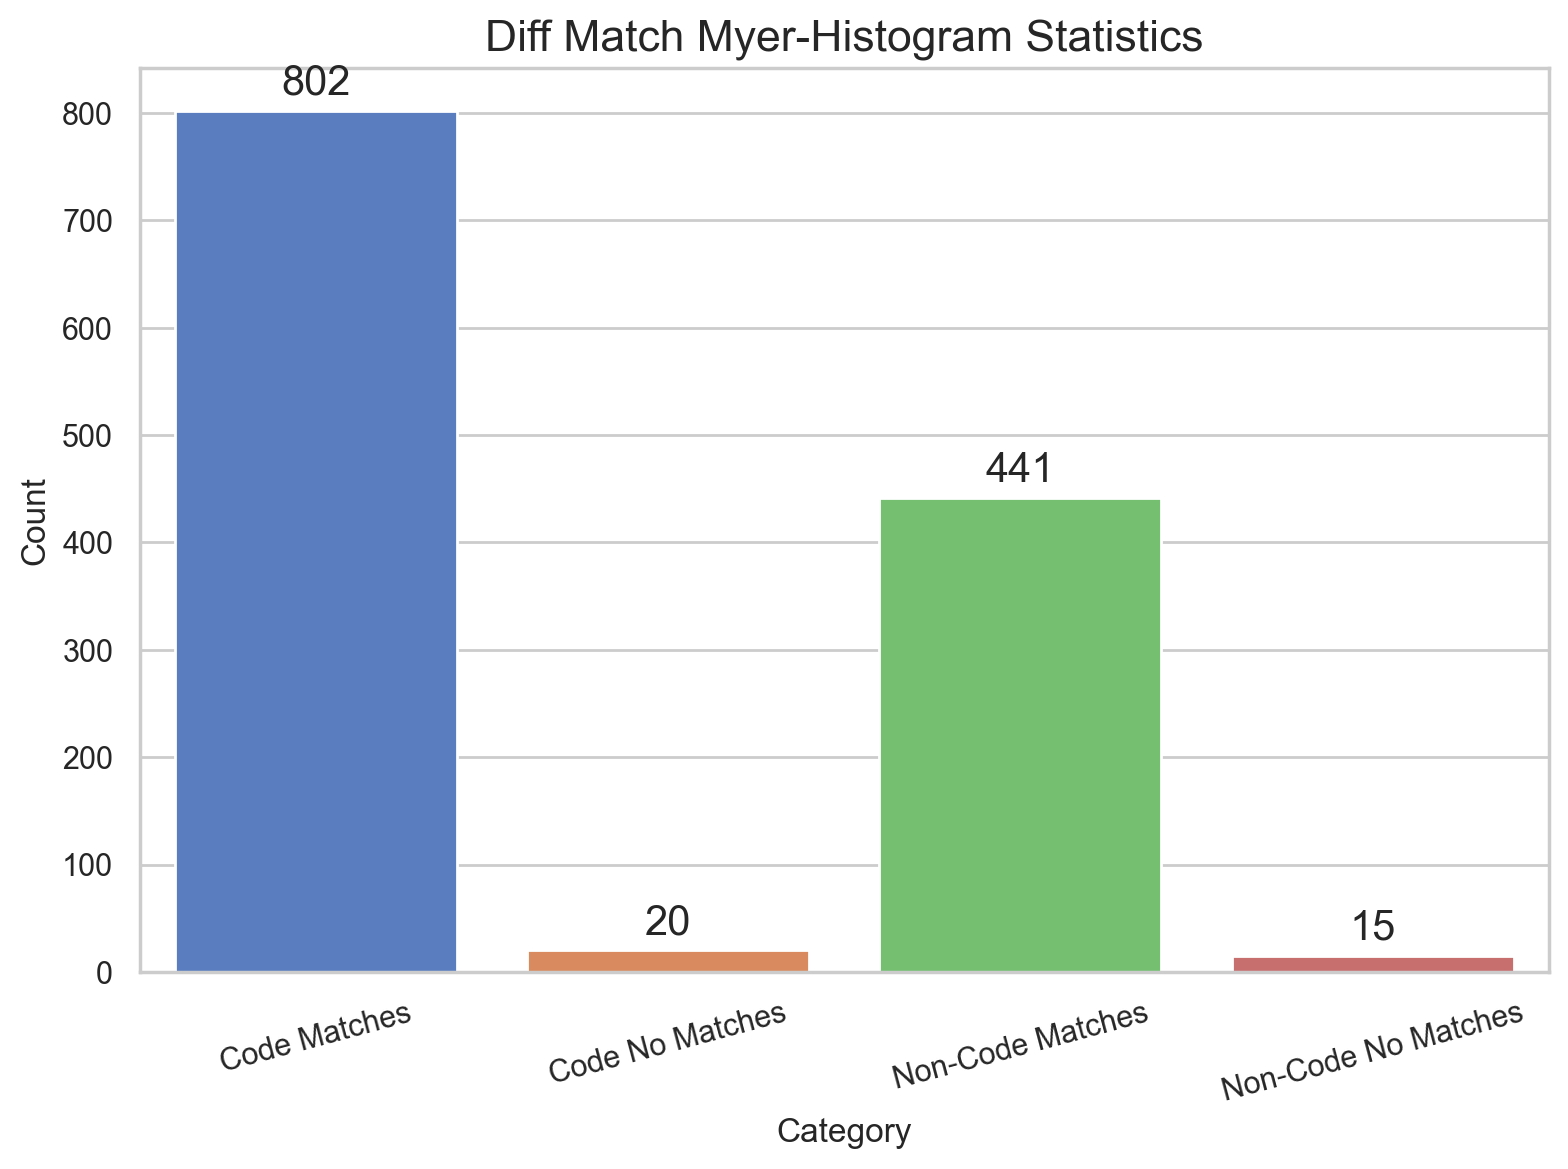

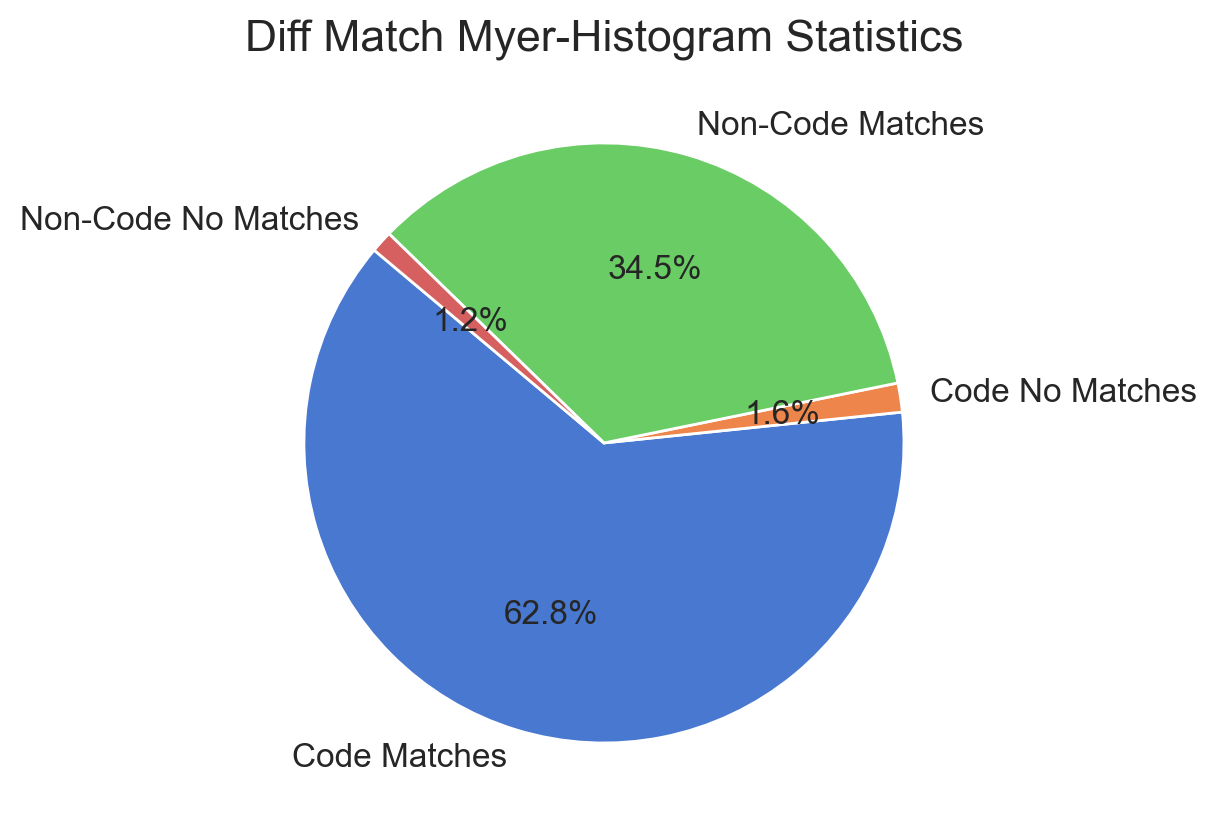

In [ ]:
code_extensions = {".js", ".html", ".css", ".ts", ".rs", ".sh", ".scss"}


def get_artifact_type(file_path):
    if not isinstance(file_path, str) or "." not in file_path:
        return "unknown"
    extension = file_path.split(".")[-1]
    if f".{extension}" in code_extensions:
        return "code"
    elif f".{extension}" not in code_extensions:
        return "non_code"
    return "unknown"


df["artifact_type"] = df["old_file_path"].apply(get_artifact_type)

code_matches = df[(df["artifact_type"] == "code") & (df["diff_match"] == "Yes")].shape[0]
code_no_matches = df[(df["artifact_type"] == "code") & (df["diff_match"] == "No")].shape[0]
non_code_matches = df[(df["artifact_type"] == "non_code") & (df["diff_match"] == "Yes")].shape[0]
non_code_no_matches = df[(df["artifact_type"] == "non_code") & (df["diff_match"] == "No")].shape[0]

print(f"Matches for code artifacts: {code_matches}")
print(f"No matches for code artifacts: {code_no_matches}")
print(f"Matches for non-code artifacts: {non_code_matches}")
print(f"No matches for non-code artifacts: {non_code_no_matches}")

plot_data = pd.DataFrame({
    "Category": ["Code Matches", "Code No Matches", "Non-Code Matches", "Non-Code No Matches"],
    "Count": [code_matches, code_no_matches, non_code_matches, non_code_no_matches]
})


sns.set_theme(style="whitegrid")
plt.figure(figsize = (8, 6))

bar_plot = sns.barplot(
    x="Category",
    y="Count",
    hue="Category",
    data=plot_data,
    palette="muted",
    dodge=False
)

bar_plot.set_title("Diff Match Myer-Histogram Statistics", fontsize=16)
bar_plot.set_xlabel("Category", fontsize=12)
bar_plot.set_ylabel("Count", fontsize=12)

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', fontsize=15, padding=3)

plt.legend([], [], frameon=False)

plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("barPlot.png", dpi=600, bbox_inches='tight')
plt.show()


colors = sns.color_palette("muted", len(plot_data))
plt.figure(figsize = (6, 6))
plt.pie(
    plot_data["Count"],
    labels=plot_data["Category"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title("Diff Match Myer-Histogram Statistics", fontsize=16)
plt.tight_layout()
plt.savefig("pieChart.png", dpi=600, bbox_inches='tight')
plt.show()